In [2]:
import pandas as pd
import os, re
import csv
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [4]:
# Metadata for specific SFC configurations
exp_ls = "exp-2"


In [5]:
def print_headers(exp_type, exp_num, file):
    file_path = os.path.join("..\\data\\pcm", exp_type, exp_num, file)

    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)  
        print("header：", headers)
    return headers

print_headers("random_input", exp_ls, "bridge-pcm_processed.csv")


header： ['System-Date', 'System-Time', 'Socket 0-EXEC', 'Socket 0-IPC', 'Socket 0-FREQ', 'Socket 0-AFREQ', 'Socket 0-L3MISS', 'Socket 0-L2MISS', 'Socket 0-L3HIT', 'Socket 0-L2HIT', 'Socket 0-L3MPI', 'Socket 0-L2MPI', 'Socket 0-L3OCC', 'Socket 0-READ', 'Socket 0-WRITE', 'Socket 0-LOCAL', 'Socket 0-TEMP', 'Socket 0-INST', 'Socket 0-ACYC', 'Socket 0-TIME(ticks)', 'Socket 0-PhysIPC', 'Socket 0-PhysIPC%', 'Socket 0-INSTnom', 'Socket 0-INSTnom%', 'Socket 1-EXEC', 'Socket 1-IPC', 'Socket 1-FREQ', 'Socket 1-AFREQ', 'Socket 1-L3MISS', 'Socket 1-L2MISS', 'Socket 1-L3HIT', 'Socket 1-L2HIT', 'Socket 1-L3MPI', 'Socket 1-L2MPI', 'Socket 1-L3OCC', 'Socket 1-READ', 'Socket 1-WRITE', 'Socket 1-LOCAL', 'Socket 1-TEMP', 'Socket 1-INST', 'Socket 1-ACYC', 'Socket 1-TIME(ticks)', 'Socket 1-PhysIPC', 'Socket 1-PhysIPC%', 'Socket 1-INSTnom', 'Socket 1-INSTnom%', 'SKT0 Core C-State-C0res%', 'SKT0 Core C-State-C1res%', 'SKT0 Core C-State-C3res%', 'SKT0 Core C-State-C6res%', 'SKT0 Core C-State-C7res%', 'SKT0 Pac

['System-Date',
 'System-Time',
 'Socket 0-EXEC',
 'Socket 0-IPC',
 'Socket 0-FREQ',
 'Socket 0-AFREQ',
 'Socket 0-L3MISS',
 'Socket 0-L2MISS',
 'Socket 0-L3HIT',
 'Socket 0-L2HIT',
 'Socket 0-L3MPI',
 'Socket 0-L2MPI',
 'Socket 0-L3OCC',
 'Socket 0-READ',
 'Socket 0-WRITE',
 'Socket 0-LOCAL',
 'Socket 0-TEMP',
 'Socket 0-INST',
 'Socket 0-ACYC',
 'Socket 0-TIME(ticks)',
 'Socket 0-PhysIPC',
 'Socket 0-PhysIPC%',
 'Socket 0-INSTnom',
 'Socket 0-INSTnom%',
 'Socket 1-EXEC',
 'Socket 1-IPC',
 'Socket 1-FREQ',
 'Socket 1-AFREQ',
 'Socket 1-L3MISS',
 'Socket 1-L2MISS',
 'Socket 1-L3HIT',
 'Socket 1-L2HIT',
 'Socket 1-L3MPI',
 'Socket 1-L2MPI',
 'Socket 1-L3OCC',
 'Socket 1-READ',
 'Socket 1-WRITE',
 'Socket 1-LOCAL',
 'Socket 1-TEMP',
 'Socket 1-INST',
 'Socket 1-ACYC',
 'Socket 1-TIME(ticks)',
 'Socket 1-PhysIPC',
 'Socket 1-PhysIPC%',
 'Socket 1-INSTnom',
 'Socket 1-INSTnom%',
 'SKT0 Core C-State-C0res%',
 'SKT0 Core C-State-C1res%',
 'SKT0 Core C-State-C3res%',
 'SKT0 Core C-State-C6res

In [6]:
def parse_seq(exp_type, exp_num, file, index=5):
    "Parse sequential data, specialized for the TX/RX/Latency experiments"
    tmp = []
    
    if file.startswith("latency_processed.csv"):
        with open(os.path.join("..\\data\\pcm", exp_type, exp_num, file)) as f:
            lines = f.readlines()[5:]# if exp_type == "ndpi-stats-random" else f.readlines()
            for i in range(len(lines)):
                try:
                    value = float(lines[i].strip()) / 1000
                except ValueError:
                    value= np.nan
                tmp.append(value)
    else:
        with open(os.path.join("..\\data\\pcm", exp_type, exp_num, file)) as f:
            next(f)
            for l in f:
                try:
                    value = float(l.strip().split(",")[index])
                except ValueError:
                    value = np.nan
                tmp.append(value)
                
    return tmp

In [7]:
def parse_reg(exp_type, exp_num, file, stat_name):
    stat = []
    file_path = os.path.join("..\\data\\pcm", exp_type, exp_num, file)

    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)
        try:
            index = headers.index(stat_name)
        except ValueError:
            print(f"Column {stat_name} not found")
            return stat
        for row in reader:
            if len(row) <= index: 
                continue  

            raw_value = row[index]
            try:
                value = float(raw_value)
            except ValueError:
                value = raw_value
            stat.append(value)


    return stat

In [8]:
tx_stats = parse_seq("random_input", exp_ls,  "tx_stats.csv")
len(tx_stats)

7187

In [9]:
rx_stats = parse_seq("random_input", exp_ls,  "rx_stats.csv")
len(rx_stats)

7187

In [10]:
bridge_L3MISS = parse_reg("random_input", exp_ls,  "ndpi_stats-pcm_processed.csv", "Socket 0-L3HIT")
print(len(bridge_L3MISS))

7183


In [11]:
features = print_headers("random_input", exp_ls,  "ndpi_stats-pcm_processed.csv")

header： ['System-Date', 'System-Time', 'Socket 0-EXEC', 'Socket 0-IPC', 'Socket 0-FREQ', 'Socket 0-AFREQ', 'Socket 0-L3MISS', 'Socket 0-L2MISS', 'Socket 0-L3HIT', 'Socket 0-L2HIT', 'Socket 0-L3MPI', 'Socket 0-L2MPI', 'Socket 0-L3OCC', 'Socket 0-READ', 'Socket 0-WRITE', 'Socket 0-LOCAL', 'Socket 0-TEMP', 'Socket 0-INST', 'Socket 0-ACYC', 'Socket 0-TIME(ticks)', 'Socket 0-PhysIPC', 'Socket 0-PhysIPC%', 'Socket 0-INSTnom', 'Socket 0-INSTnom%', 'Socket 1-EXEC', 'Socket 1-IPC', 'Socket 1-FREQ', 'Socket 1-AFREQ', 'Socket 1-L3MISS', 'Socket 1-L2MISS', 'Socket 1-L3HIT', 'Socket 1-L2HIT', 'Socket 1-L3MPI', 'Socket 1-L2MPI', 'Socket 1-L3OCC', 'Socket 1-READ', 'Socket 1-WRITE', 'Socket 1-LOCAL', 'Socket 1-TEMP', 'Socket 1-INST', 'Socket 1-ACYC', 'Socket 1-TIME(ticks)', 'Socket 1-PhysIPC', 'Socket 1-PhysIPC%', 'Socket 1-INSTnom', 'Socket 1-INSTnom%', 'SKT0 Core C-State-C0res%', 'SKT0 Core C-State-C1res%', 'SKT0 Core C-State-C3res%', 'SKT0 Core C-State-C6res%', 'SKT0 Core C-State-C7res%', 'SKT0 Pac

In [12]:
features_pcie = print_headers("random_input", exp_ls,   "pcm-pcie_processed.csv")

header： ['skt-0_PCIRdCur-total', 'skt-0_RFO-total', 'skt-0_CRd-total', 'skt-0_DRd-total', 'skt-0_ItoM-total', 'skt-0_PRd-total', 'skt-0_WiL-total', 'skt-0_PCIRdCur-miss', 'skt-0_RFO-miss', 'skt-0_CRd-miss', 'skt-0_DRd-miss', 'skt-0_ItoM-miss', 'skt-0_PRd-miss', 'skt-0_WiL-miss', 'skt-0_PCIRdCur-hit', 'skt-0_RFO-hit', 'skt-0_CRd-hit', 'skt-0_DRd-hit', 'skt-0_ItoM-hit', 'skt-0_PRd-hit', 'skt-0_WiL-hit', 'skt-1_PCIRdCur-total', 'skt-1_RFO-total', 'skt-1_CRd-total', 'skt-1_DRd-total', 'skt-1_ItoM-total', 'skt-1_PRd-total', 'skt-1_WiL-total', 'skt-1_PCIRdCur-miss', 'skt-1_RFO-miss', 'skt-1_CRd-miss', 'skt-1_DRd-miss', 'skt-1_ItoM-miss', 'skt-1_PRd-miss', 'skt-1_WiL-miss', 'skt-1_PCIRdCur-hit', 'skt-1_RFO-hit', 'skt-1_CRd-hit', 'skt-1_DRd-hit', 'skt-1_ItoM-hit', 'skt-1_PRd-hit', 'skt-1_WiL-hit']


In [13]:
features_memory = print_headers("random_input", exp_ls, "pcm-memory_processed.csv")

header： ['SKT0-Ch0Read', 'SKT0-Ch0Write', 'SKT0-Ch1Read', 'SKT0-Ch1Write', 'SKT0-Mem Read (MB/s)', 'SKT0-Mem Write (MB/s)', 'SKT0-P. Write (T/s)', 'SKT0-Memory (MB/s)', 'SKT1-Ch0Read', 'SKT1-Ch0Write', 'SKT1-Ch1Read', 'SKT1-Ch1Write', 'SKT1-Mem Read (MB/s)', 'SKT1-Mem Write (MB/s)', 'SKT1-P. Write (T/s)', 'SKT1-Memory (MB/s)', 'System-Read', 'System-Write', 'System-Memory']


In [14]:
features_latency= print_headers("random_input", exp_ls, "latency_processed.csv")

header： ['latency']


In [15]:
features_pktsize=  [ 'PacketRate', 'Mbit', 'MbitWithFraming', 'TotalPackets', 'TotalBytes']
#print_headers("ndpi-stats-random", exp_ls, "tx_stats.csv")

In [16]:
latency = parse_seq("random_input",exp_ls,"latency_processed.csv")
print(latency)

[15000.0, 10.928, 7.555, 48.032, 11.168, 574.365, 48.682, 52.252, 39.081, 26.81, 37.946, 16.819, 23.28, 39.072, 39.53, 29.168, 27.862, 26.457, 37.062, 27.447, 26.717, 27.386, 26.432, 18.316, 29.386, 37.034, 23.286, 17.872, 13.587, 24.557, 29.216, 15.098, 35.373, 15.107, 50.873, 33.069, 18.125, 13.827, 16.63, 11.113, 24.003, 13.069, 18.208, 14.17, 9.891, 15.98, 11.184, 16.989, 8.31, 14.134, 11.613, 14.147, 13.341, 20.614, 22.477, 20.22, 14.621, 10.781, 12.237, 28.397, 20.88, 10.704, 14.64, 11.625, 13.284, 17.664, 7.257, 24.736, 9.498, 13.228, 10.32, 27.974, 16.854, 16.611, 10.662, 14.835, 16.202, 14.928, 22.598, 25.52, 26.279, 30.336, 20.986, 14.505, 17.065, 28.458, 22.412, 20.378, 20.051, 25.705, 29.238, 29.699, 16.704, 17.437, 29.11, 13.488, 25.625, 22.909, 28.791, 27.145, 19.741, 33.171, 34.313, 13.316, 20.461, 16.582, 37.354, 28.963, 18.445, 18.205, 16.538, 11.36, 19.642, 22.983, 19.885, 19.207, 41.212, 17.737, 16.822, 9.578, 12.006, 9.769, 16.272, 17.658, 19.571, 11.12, 8.438, 19.4

In [17]:
Infos=["ndpi_stats-pcm_processed.csv"]
Infos_pcie = ["pcm-pcie_processed.csv"]
Infos_memory =["pcm-memory_processed.csv"]
Infos_latency = ["latency_processed.csv"]
Infos_pktsize = ["tx_stats.csv"]
def make_df():
    tmp = []
    dic = dict()
    tx_stats = parse_seq("random_input", exp_ls, "tx_stats.csv")
    rx_stats = parse_seq("random_input", exp_ls, "rx_stats.csv")
    latency = parse_seq("random_input",exp_ls,"latency_processed.csv")
    seq_length = min(len(tx_stats), len(rx_stats),
                     len(parse_reg("random_input", exp_ls, "ndpi_stats-pcm_processed.csv", 'System-Date')), 
                     len(parse_reg("random_input", exp_ls, "pcm-pcie_processed.csv", 'skt-0_PCIRdCur-total')),
                     len(parse_seq("random_input", exp_ls,  "rx_stats.csv")))
    dic["input_rate"] = tx_stats[:seq_length]
    dic["output_rate"] = rx_stats[:seq_length]
    dic["latency"] = latency[:seq_length]
    for f in features:
        for v in Infos:
            tmp =parse_reg("random_input", exp_ls, "ndpi_stats-pcm_processed.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp
            
    for f in features_pcie:
        for v in Infos_pcie:
            tmp =parse_reg("random_input", exp_ls, "pcm-pcie_processed.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
    for f in features_memory:
        for v in Infos_memory:
            tmp =parse_reg("random_input", exp_ls, "pcm-memory_processed.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
                
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
    for f in features_pktsize:
        for v in Infos_pktsize:
            tmp =parse_reg("random_input", exp_ls, "tx_stats.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
    
    return pd.DataFrame(dic)

#bridge_L3MISS = parse_reg("fixed_rate", exp_ls,  "bridge-pcm.csv", "Socket 0-L3HIT")
#print(len(bridge_L3MISS))

In [18]:
df = make_df()


In [19]:
print(df)

       input_rate  output_rate    latency  \
0      668.708174   438.633110  15000.000   
1      460.142741   538.878253     10.928   
2      583.295008   574.639166      7.555   
3      705.272073   665.054772     48.032   
4     3309.406721  3637.673596     11.168   
...           ...          ...        ...   
7130  6191.601937  6190.277065    304.790   
7131  6180.806480  6180.212673    216.800   
7132  6187.966057  6188.932060    229.926   
7133  6190.891579  6190.565356    272.643   
7134  6190.716789  6190.631200    296.055   

     ndpi_stats-pcm_processed_System-Date  \
0                              2024-02-27   
1                              2024-02-27   
2                              2024-02-27   
3                              2024-02-27   
4                              2024-02-27   
...                                   ...   
7130                           2024-02-27   
7131                           2024-02-27   
7132                           2024-02-27   
7133     

In [20]:
def classify_packetrate(rate):
    if rate > 10.5:
        return 64
    elif 7 <= rate <= 10.5:
        return 128
    elif 3 <= rate < 7:
        return 256
    elif 1.8 <= rate < 3:
        return 512
    elif 1 <= rate < 1.8:
        return 1024
    else: # rate < 1
        return 1514

# Apply the function to create a new column
df['packetsize'] = df['tx_stats_PacketRate'].apply(classify_packetrate)

In [21]:
abs_path = os.path.join("..\\datasets_pcm", "random_input_"+ exp_ls +".csv")
df.to_csv(abs_path, sep=',')


In [22]:
df.columns

Index(['input_rate', 'output_rate', 'latency',
       'ndpi_stats-pcm_processed_System-Date',
       'ndpi_stats-pcm_processed_System-Time',
       'ndpi_stats-pcm_processed_Socket 0-EXEC',
       'ndpi_stats-pcm_processed_Socket 0-IPC',
       'ndpi_stats-pcm_processed_Socket 0-FREQ',
       'ndpi_stats-pcm_processed_Socket 0-AFREQ',
       'ndpi_stats-pcm_processed_Socket 0-L3MISS',
       ...
       'pcm-memory_processed_SKT1-Memory (MB/s)',
       'pcm-memory_processed_System-Read', 'pcm-memory_processed_System-Write',
       'pcm-memory_processed_System-Memory', 'tx_stats_PacketRate',
       'tx_stats_Mbit', 'tx_stats_MbitWithFraming', 'tx_stats_TotalPackets',
       'tx_stats_TotalBytes', 'packetsize'],
      dtype='object', length=169)

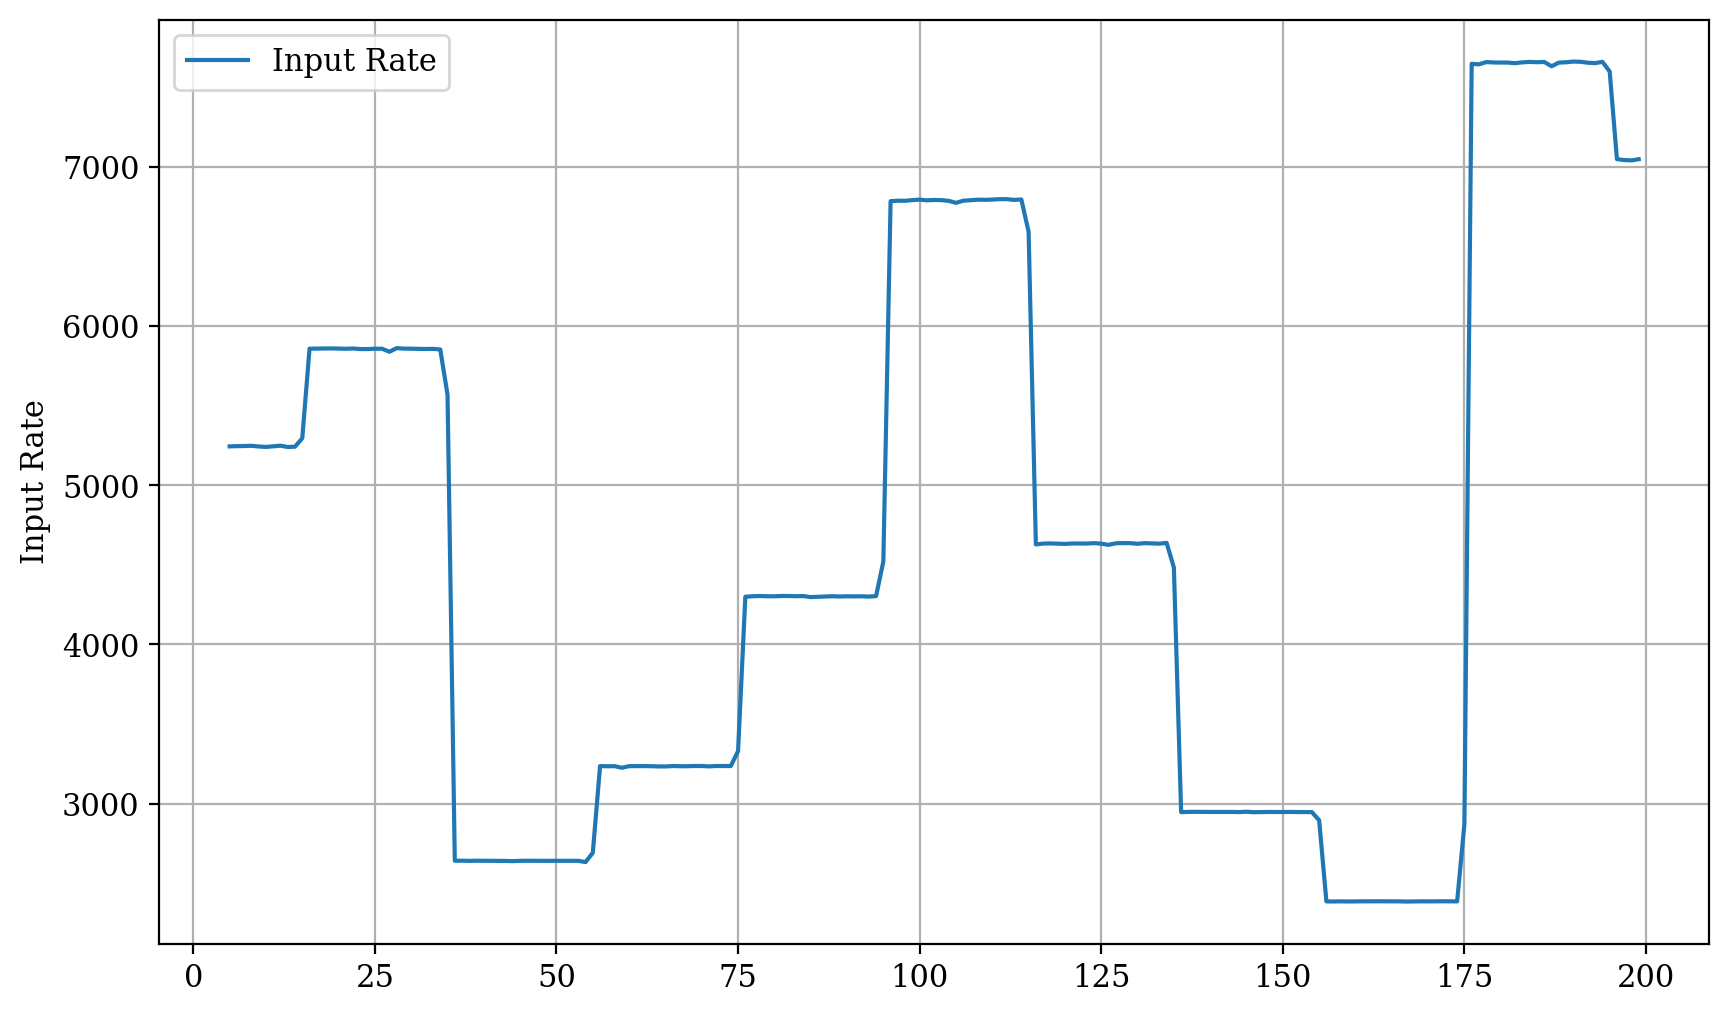

In [23]:
plt.figure(figsize=(10, 6)) 
plt.plot(df['input_rate'][5:200], label='Input Rate')
#plt.plot(df['output_rate'][5::], label='Input Rate')
plt.ylabel('Input Rate')  
plt.legend() 
plt.grid(True)
plt.show() 

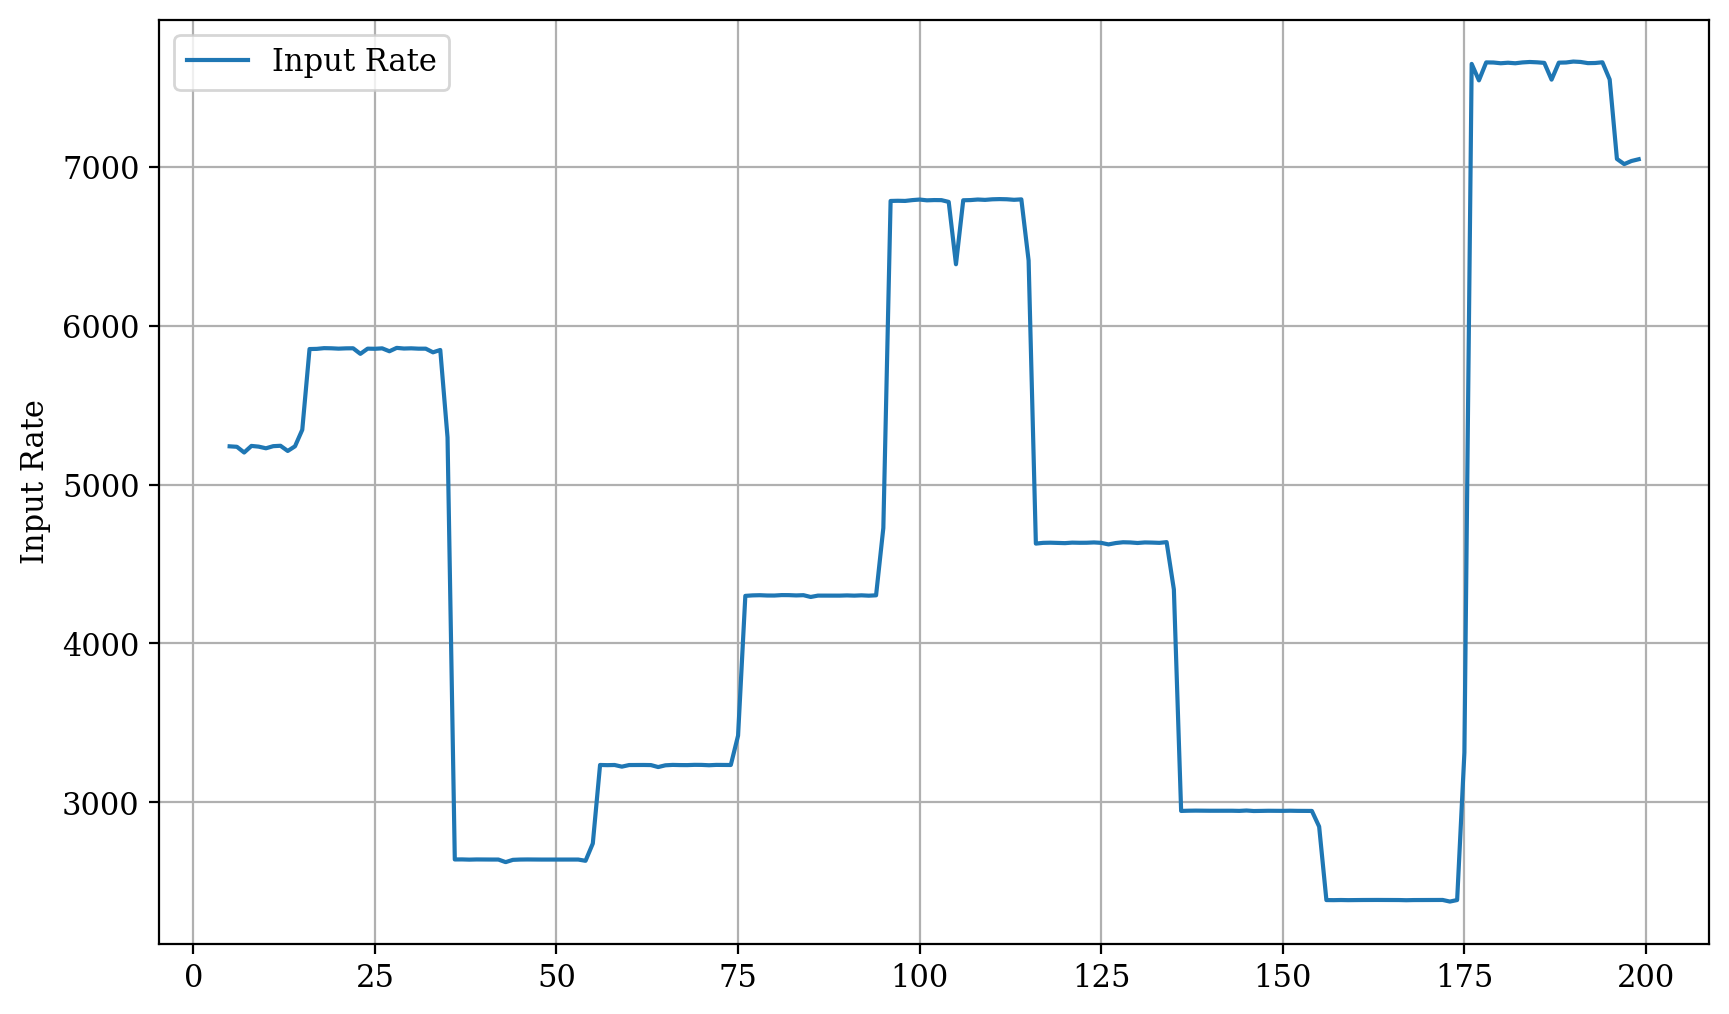

In [24]:
plt.figure(figsize=(10, 6)) 
plt.plot(df['output_rate'][5:200], label='Input Rate')
plt.ylabel('Input Rate')  
plt.legend() 
plt.grid(True)
plt.show() 

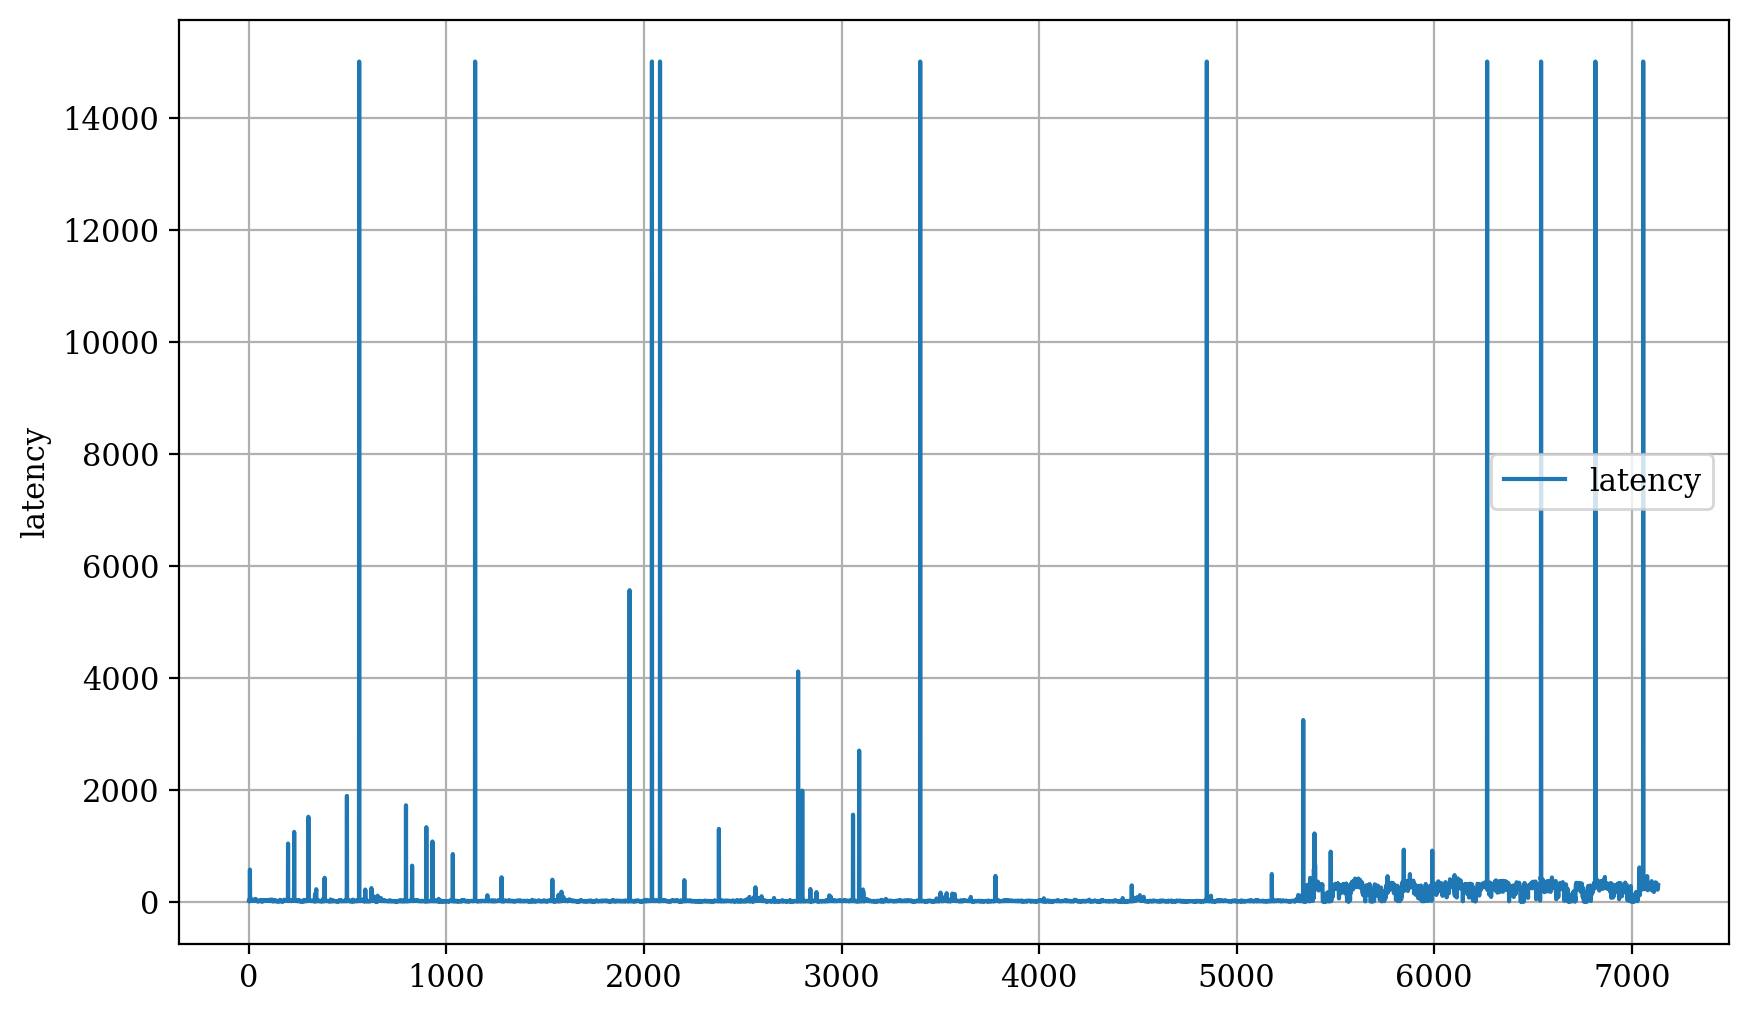

In [25]:
plt.figure(figsize=(10, 6)) 
#plt.plot(df['input_rate'][5:200], label='Input Rate')
plt.plot(df['latency'][1::], label='latency')
plt.ylabel('latency')  
plt.legend() 
plt.grid(True)
plt.show() 

In [26]:
df_subset = df.iloc[:10000]

abs_path = os.path.join("..\\datasets_pcm", "random_input_"+ exp_ls +".csv")
#df_subset.to_csv(abs_path, sep=',')


In [27]:
import pandas as pd

# 假设df是你的DataFrame

# 筛选出latency大于6000的值
condition = df["latency"] > 6000
filtered_df = df[condition]

# 计算大于6000的值的数量
count_greater_than_6000 = filtered_df.shape[0]

# 计算总数据点的数量
total_count = df.shape[0]

# 计算百分比
percentage = (count_greater_than_6000 / total_count) * 100

print(f"大于6000的数据点数量: {count_greater_than_6000}")
print(f"占总数据点的百分比: {percentage}%")


大于6000的数据点数量: 11
占总数据点的百分比: 0.15416958654519972%


In [34]:
import pandas as pd

# 假设df是你的DataFrame

# 筛选出inputrate大于6000的值
condition = df["input_rate"] > 7800
filtered_df = df[condition]

# 计算大于6000的值的数量
count_greater_than_6000 = filtered_df.shape[0]

# 计算总数据点的数量
total_count = df.shape[0]

# 计算百分比
percentage = (count_greater_than_6000 / total_count) * 100

print(f"大于6000的数据点数量: {count_greater_than_6000}")
print(f"占总数据点的百分比: {percentage}%")

大于6000的数据点数量: 152
占总数据点的百分比: 2.130343377715487%
